In [17]:
!pip install ipyplot

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd 
from sklearn.utils import shuffle
import ipyplot
from tensorflow.keras.layers import*
from tensorflow.keras.models import*
from tensorflow.keras.losses import*
from tensorflow.keras.optimizers import*
import os
import math
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [19]:
training_label_path = '/kaggle/input/classification-data/training_mask_label.npy'
training_file_path = '/kaggle/input/classification-data/training_mask_arr.npy'
testing_file_path = '/kaggle/input/classification-data/testing_mask_arr.npy'
testing_label_path = '/kaggle/input/classification-data/testing_mask_label.npy'

training_images,training_labels,testing_images,testing_labels=np.load(training_file_path),np.load(training_label_path),np.load(testing_file_path),np.load(testing_label_path)
print("shape of training data",training_images.shape,",",training_labels.shape)
print("shape of testing data",testing_images.shape,",",testing_labels.shape)

shape of training data (1200, 256, 256, 3) , (1200, 3)
shape of testing data (300, 256, 256, 3) , (300, 3)


In [20]:
training_images, training_labels = shuffle(training_images, training_labels)
testing_images,testing_labels = shuffle(testing_images,testing_labels)




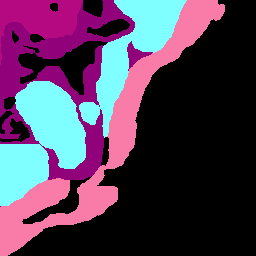
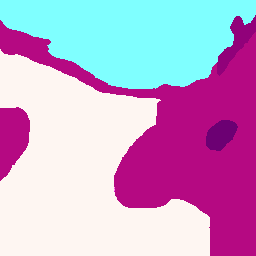
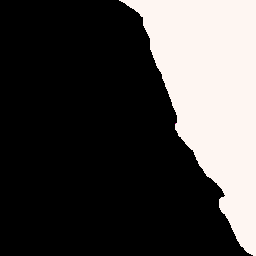
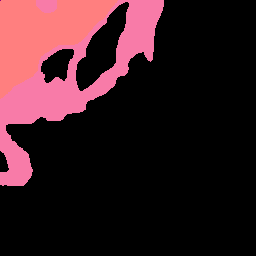
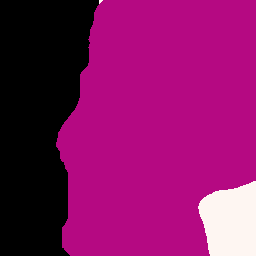
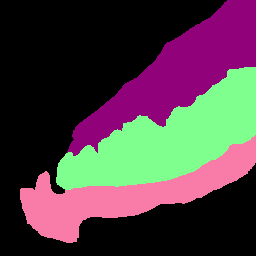
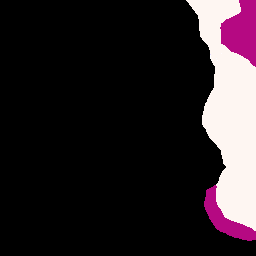
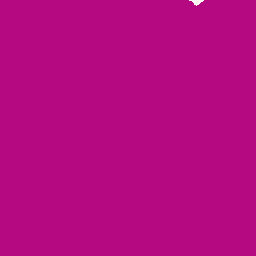
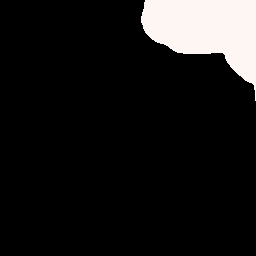
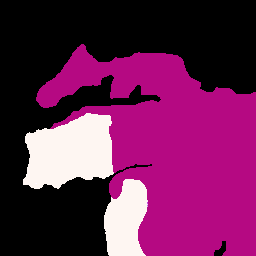


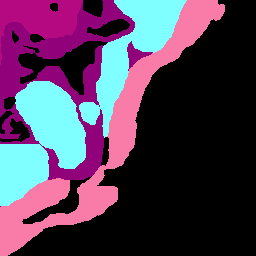
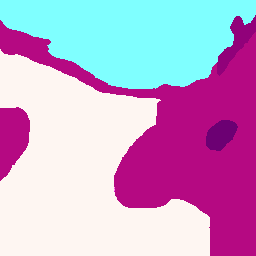
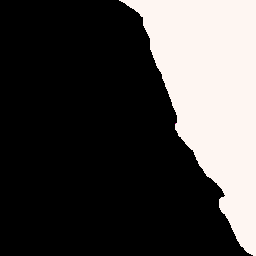
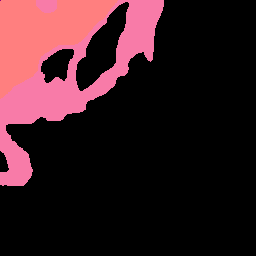
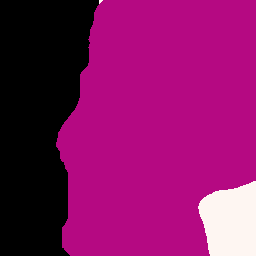
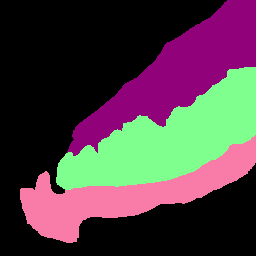
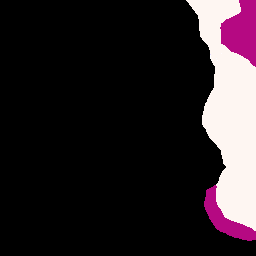
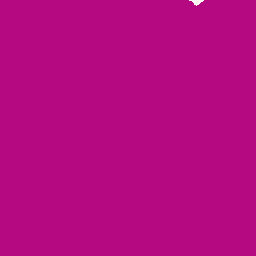
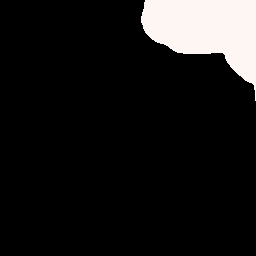
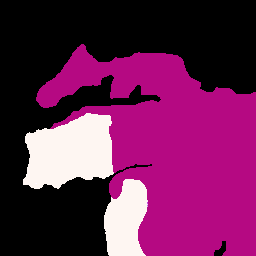

[[1 0 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


In [21]:
ipyplot.plot_images(training_images[:,:,:,::-1],max_images = 10, img_width = 100)
print(training_labels[:10])

In [71]:
classes = 3

#model

inputs = Input((256,256,3))

conv1 = Conv2D(16,3,activation = 'relu', padding = 'same')(inputs)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1) 

conv2 = Conv2D(32,3,activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2) 


conv3 = Conv2D(64,3,activation = 'relu', padding = 'same')(pool2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3) 

conv4 = Conv2D(128,3,activation = 'relu', padding = 'same')(pool3)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)

conv5 = Conv2D(256,3,activation = 'relu', padding = 'same')(pool4)
drop5 = Dropout(0.25)(conv5)
x = GlobalAveragePooling2D()(drop5)
x = Dense(256,activation = 'relu', name = 'Dense_1', dtype='float32')(x)
x = Dense(128,activation = 'relu', name = 'Dense_2', dtype='float32')(x)
x = Dense(32,activation = 'relu', name = 'Dense_3', dtype='float32')(x)
x = Dense(classes,activation = 'softmax', name = 'Output', dtype='float32')(x)

my_model = Model(inputs = [inputs], outputs=[x])

my_optimiser = Adam(lr = 0.00001)
my_model.compile(loss='categorical_crossentropy',optimizer = my_optimiser,metrics = ['categorical_accuracy'])
print("done")
my_model.summary()



done
Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_46 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 64, 64, 64)      

In [72]:
epochs = 200

my_model_history = my_model.fit(x=training_images,
                                y=training_labels,  
                                batch_size=30,
                                epochs = epochs,
                                validation_split=0.1)


Epoch 1/200


2023-06-04 08:54:11.504795: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_10/dropout_10/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


36/36 [==============================] - 4s 35ms/step - loss: 1.6166 - categorical_accuracy: 0.4037 - val_loss: 0.9132 - val_categorical_accuracy: 0.5583
Epoch 2/200
36/36 [==============================] - 1s 29ms/step - loss: 0.8168 - categorical_accuracy: 0.6213 - val_loss: 0.7380 - val_categorical_accuracy: 0.6417
Epoch 3/200
36/36 [==============================] - 1s 29ms/step - loss: 0.7044 - categorical_accuracy: 0.6713 - val_loss: 0.7456 - val_categorical_accuracy: 0.6750
Epoch 4/200
36/36 [==============================] - 1s 30ms/step - loss: 0.6697 - categorical_accuracy: 0.6685 - val_loss: 0.6441 - val_categorical_accuracy: 0.6583
Epoch 5/200
36/36 [==============================] - 1s 31ms/step - loss: 0.6258 - categorical_accuracy: 0.7278 - val_loss: 0.6630 - val_categorical_accuracy: 0.6417
Epoch 6/200
36/36 [==============================] - 1s 29ms/step - loss: 0.6218 - categorical_accuracy: 0.7120 - val_loss: 0.6245 - val_categorical_accuracy: 0.6833
Epoch 7/200
36/3

10/10 [==============================] - 0s 7ms/step
(300, 3)


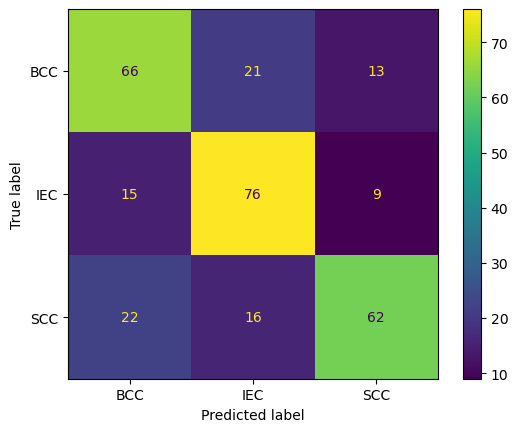

In [73]:
my_predictions = my_model.predict(testing_images)
print(my_predictions.shape)
classes = ['BCC','IEC','SCC']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.show()

In [86]:
cm = confusion_matrix(list(np.argmax(testing_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))

In [87]:
accuracy = (cm[0][0] + cm[1][1] + cm[2][2]) / sum(sum(cm))

print("Accuracy:", accuracy)

Accuracy: 0.68
